# Alucar - Analisando vendas
**Objetivo:**Neste primeiro momento vou apresentar comportamentos de tendência nos gráficos e observações quanto a valores de variação de algo, trazendo um pouco da importância de analisar também os dois eixos presentes nos gráficos.

**Tendência:** Comportamento de um gráfico que tende a um alguma coisa, como tendência a crescer.

**Primeira coisa a fazer:** Importar bibliotecas e dados a usar

In [30]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
alucar = pd.read_csv('alucar.csv',sep=',')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [31]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [32]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

* vamos transformar o tipo dos valores da variável mês que é object para timeseries para trabalhar com séries temporais. Usa-se pd.to_datetime()

In [33]:
alucar['mes'] = pd.to_datetime(alucar.mes)

In [34]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

* Agora que temos tipos int e datetime podemos fazer gráficos com seaborn sem problemas

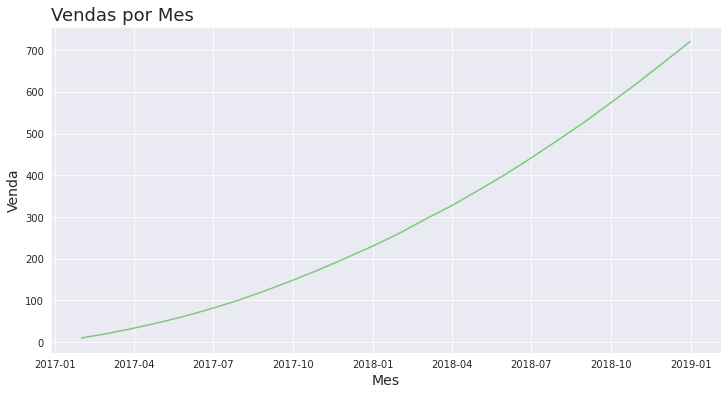

In [35]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas por Mes', fontsize = 18, loc = 'left')
ax.set_ylabel('Venda', fontsize = 14)
ax.set_xlabel('Mes', fontsize = 14)
ax= ax

* O comando .diff() calcula a diferença entre cada linha e anterior
* A diferença das vendas é o aumento das vendas. E a diferença do aumento é a aceleração


In [36]:
alucar['aumento']=alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


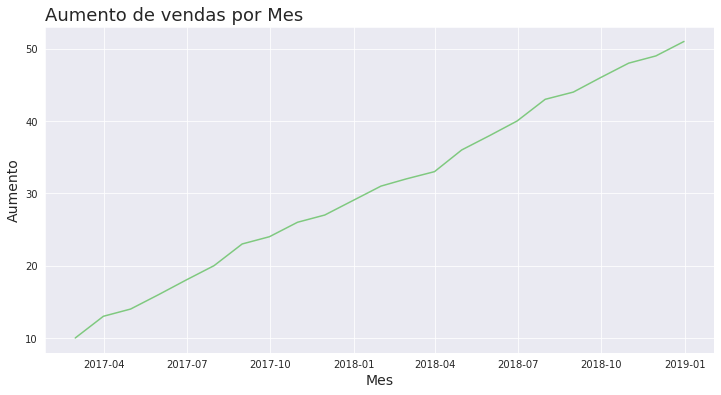

In [37]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento de vendas por Mes', fontsize = 18, loc = 'left')
ax.set_ylabel('Aumento', fontsize = 14)
ax.set_xlabel('Mes', fontsize = 14)
ax= ax

* Função para fazer gráficos para facilitar futuramente

In [89]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

In [38]:
alucar['aceleracao'] = alucar.aumento.diff()

In [39]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


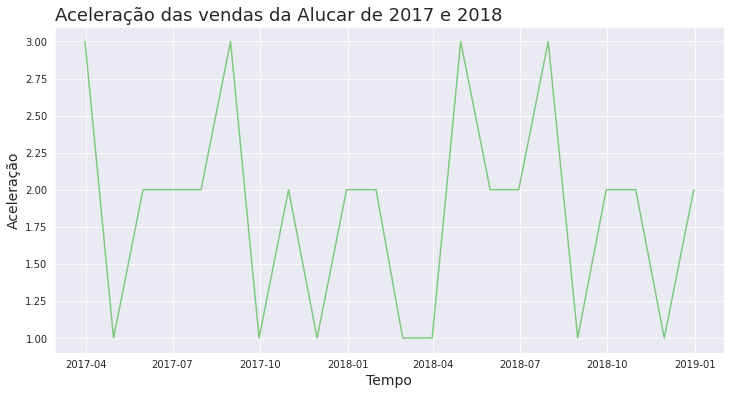

In [117]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
      'mes', 'aceleracao', alucar)

* Os gráficos podem ser colocados um abaixo do outro para melhorar a visualização e compração, já que um é a diferença do outro

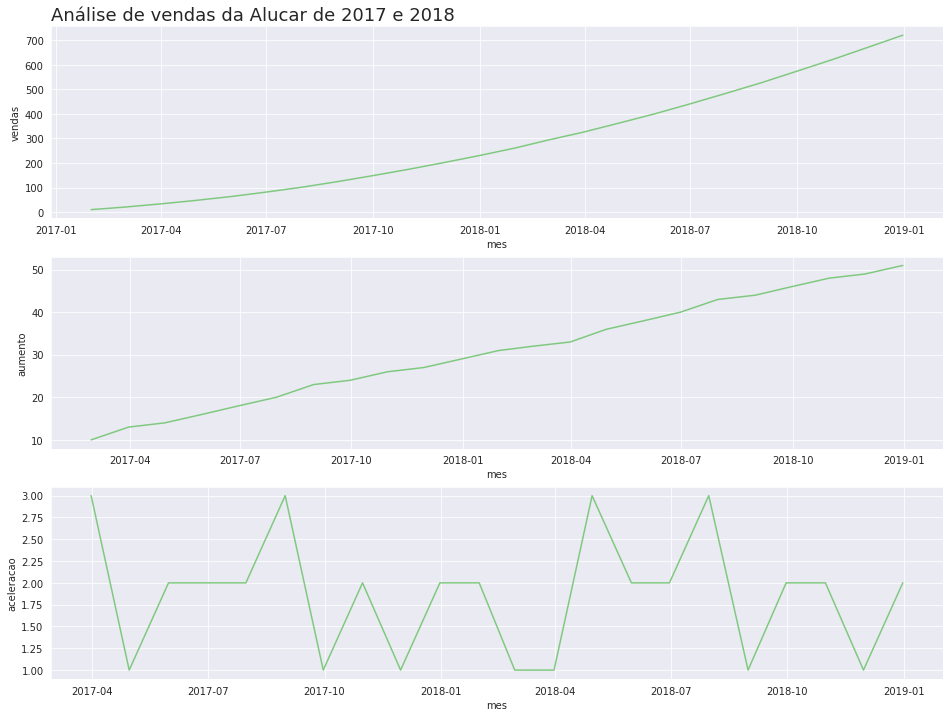

In [41]:
plt.figure(figsize = (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18,loc='left')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

plt.subplot( 3,1,2) 
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)

plt.subplot( 3,1,3) 
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

* Abaixo vamos fazer uma função para facilitar esses gráficos triplos que será feito mais vezes 

In [18]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

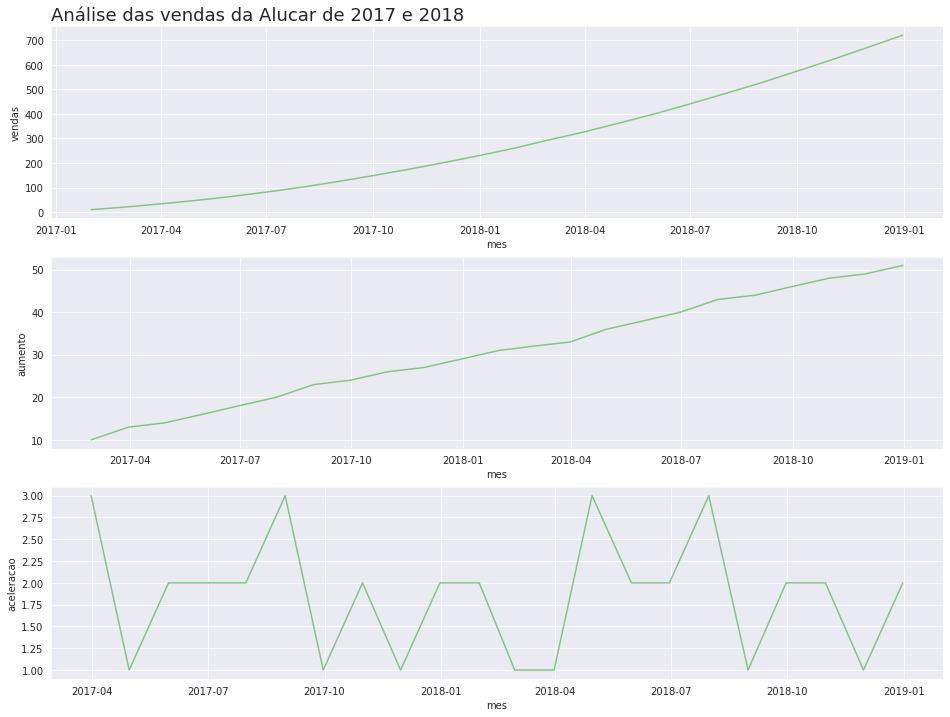

In [19]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da Alucar de 2017 e 2018')

**Analisando os gráficos**

Os gráficos apresentam uma tendência de crescimento nas vendas e no aumento de vendas. Isso não é possível observar na aceleração que apresenta altas e baixas, mas que nunca obtem um valor negativo, ou seja, não apresenta diminuição no aumento.

## Correlação
* Como fazer correlação de dados usando autocorrelation_plot do pandas

In [42]:
from pandas.plotting import autocorrelation_plot

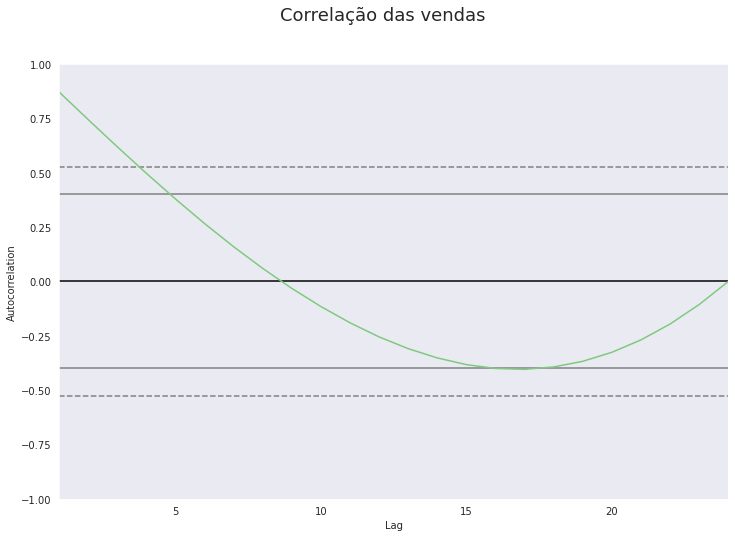

In [43]:
ax = plt.figure(figsize = (12,8))
ax.suptitle('Correlação das vendas', fontsize = 18)
autocorrelation_plot(alucar['vendas'])
ax = ax

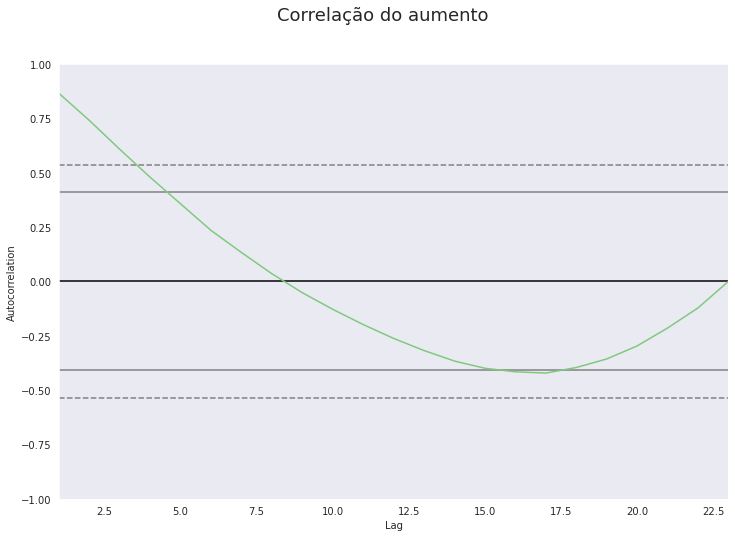

In [ ]:
ax = plt.figure(figsize = (12,8))
ax.suptitle('Correlação do aumento', fontsize = 18)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

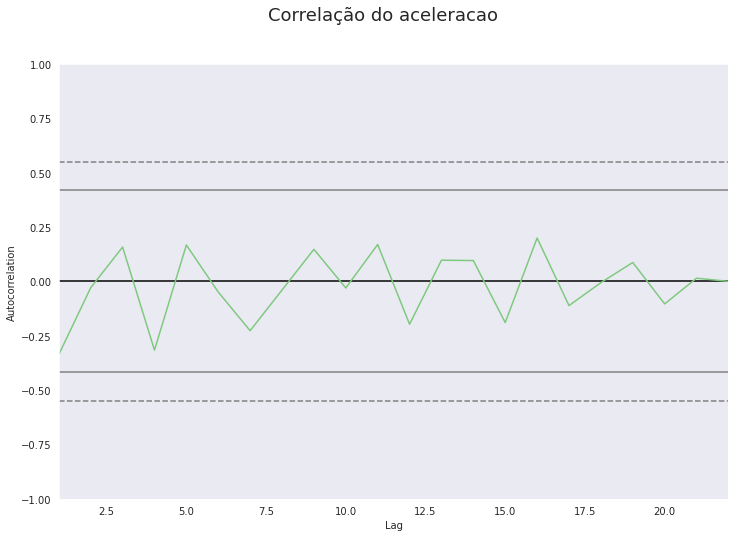

In [ ]:
ax = plt.figure(figsize = (12,8))
ax.suptitle('Correlação do aceleracao', fontsize = 18)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter
* Vamos refazer o que foi feito na análise de vendas

In [119]:
assinantes = pd.read_csv('newsletter_alucar.csv')
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


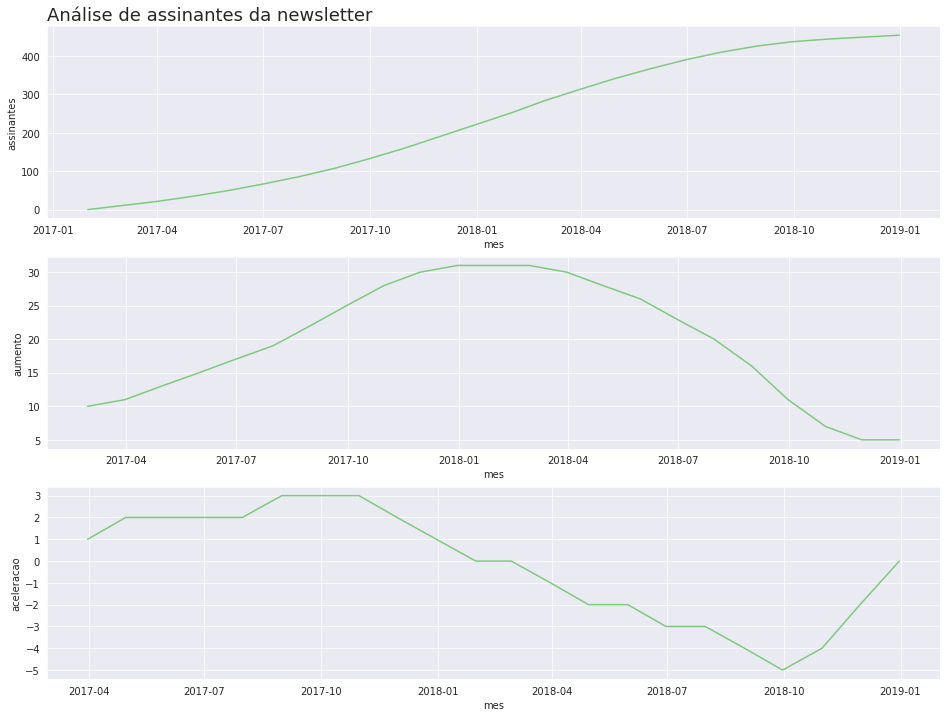

In [49]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 
                assinantes, 'Análise de assinantes da newsletter')

* Nas vendas é possível observar uma tendência de crescimento até o mês 07 de 2018, quando o comportamento passa a ser mais linear para constante.
* No aumento é possível ver que até o mês 02/03 de 2018 há crescimento, e após isto há queda até o valor 5, no mês 12 de 2018, quando fica estável.
* No gráfico de aceleração há uma queda para valores negativos após a data 03/2018, isto mostra a queda do valor do aumento

# Chocolura - Analisando as vendas
**Objetivos:**Aqui vamos começar a observar sazonalidade.

**Sazonalidade:** É o comportamento que se repete periódicamente

In [120]:
chocolura = pd.read_csv('chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


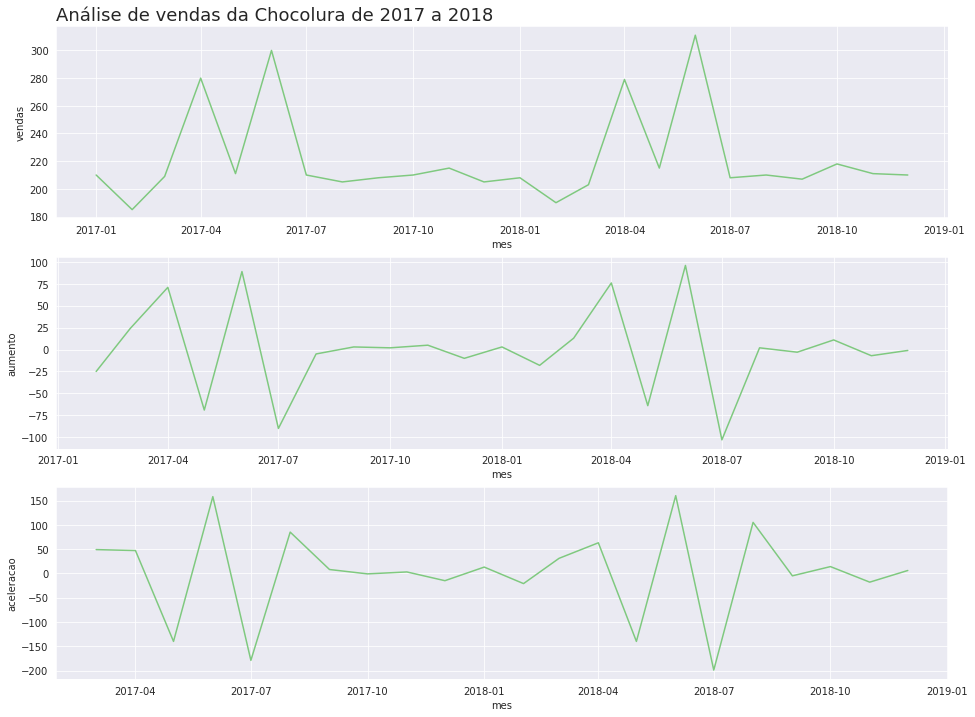

In [55]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

* Observa-se sazonalidade nos três gráficos, repetindo aumento de vendas no mês 04 e 06. Como esta é uma empresa fictícia de vendas de chocolate podemos atribuir o aumento nas vendas pela compra de chocolates na páscoa e no dia dos namorados

# Chocolura - Vendas diárias (Outubro e Novembro)

In [121]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


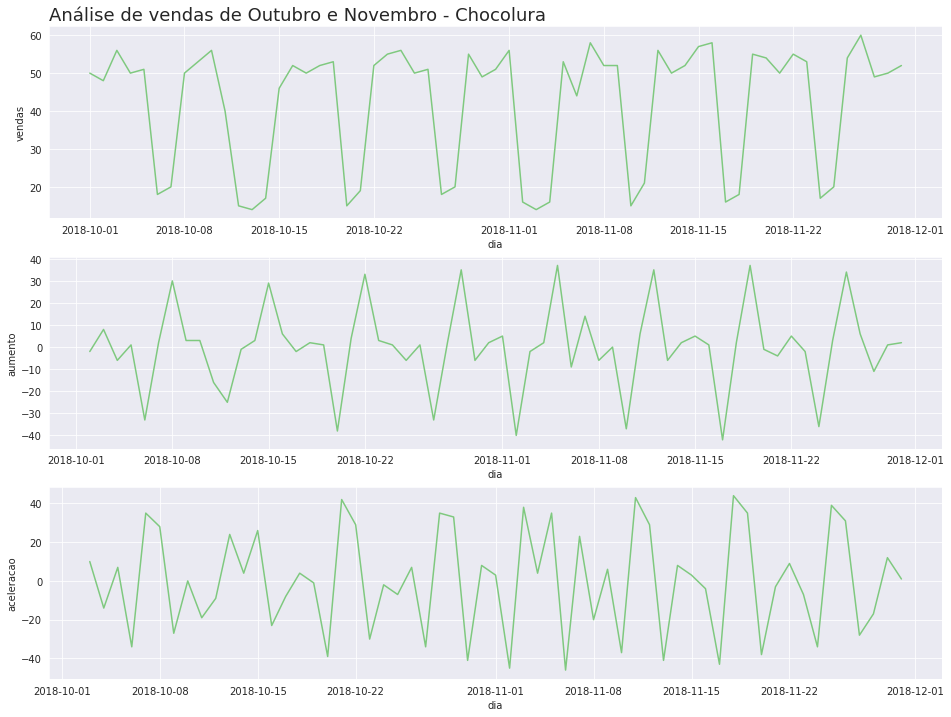

In [61]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

* Observa-se aqui sazonalidade nos gráficos durantes os dias do mês de outubro e novembro

**Analisando a sazonalidade**

dt.day_name() serve para colocar dias da semana

In [123]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [124]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [125]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [126]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [127]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


**Agrupando os dias**
* Queremos a média da venda, do aumento e da aceleração para cada dia. Pra isto agrupamos por dia da semana e pedimos a média. o Round serve para melhor apresentar os dados

In [128]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [129]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

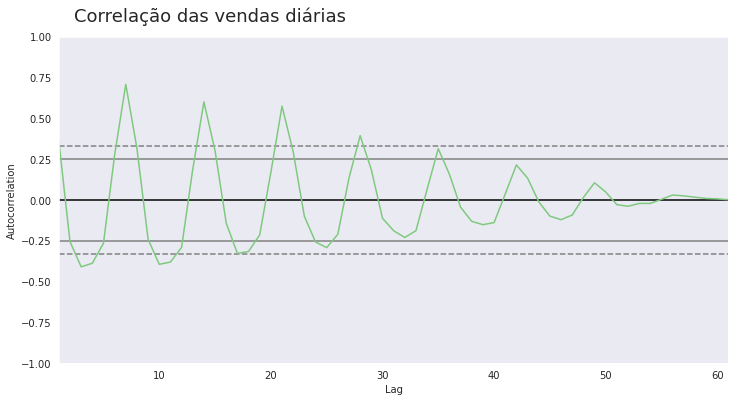

In [130]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

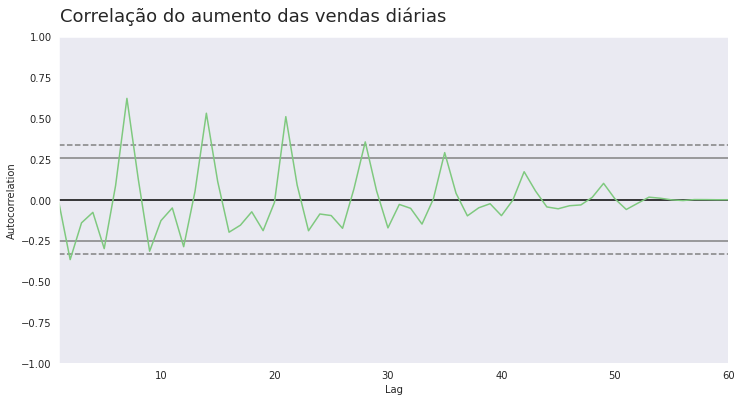

In [131]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

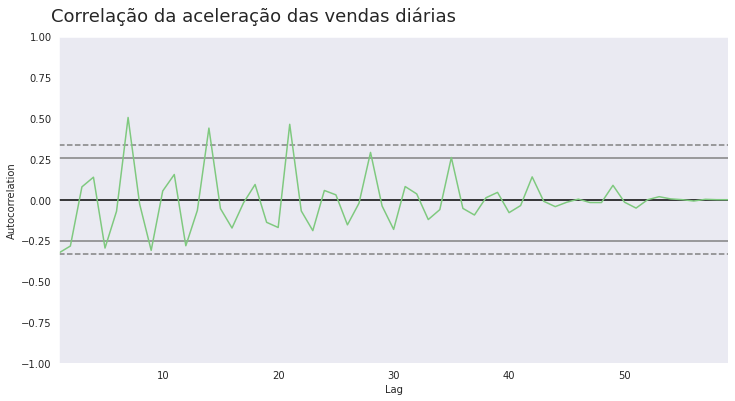

In [132]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

* Perceba que ocorre uma sazonalidade na correleção e uma tendência a um valor nulo

# Cafelura - Análise de vendas
* **Objetivo:** Vamos ver como fazer a normalização
* **Normalização:** Serve para observar melhor a tendência do seu gráfico, que pode parecer apresentar sazonalidade. É uma ótima técnica para "organizar" a visualização.
* Sempre que estiver acompanhando números agregados em uma time series como resultados semanais, mensais ou trimestrais, podemos utilizar a técnica de normalização.

In [133]:
cafelura = pd.read_csv('cafelura.csv')
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())
cafelura.head()

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


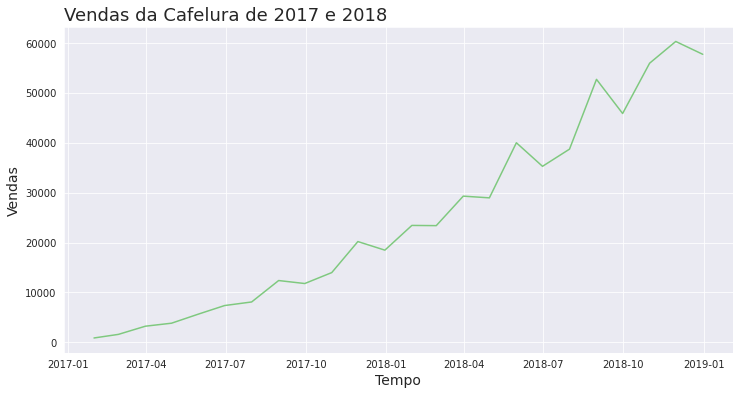

In [90]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

* O gráfico parece apresenta uma tendência crescente e uma sazonalidade. Vamos normalizar pra averiguar se é sazonalidade mesmo.
* Para normalizar devemos dividir os valores pela quantidade de dias do mês, fim de semana, afins

In [91]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [92]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [93]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


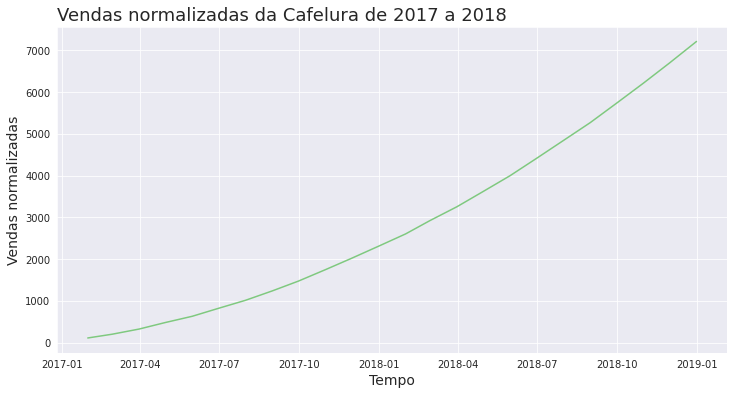

In [94]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018',
      'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas',
      cafelura)

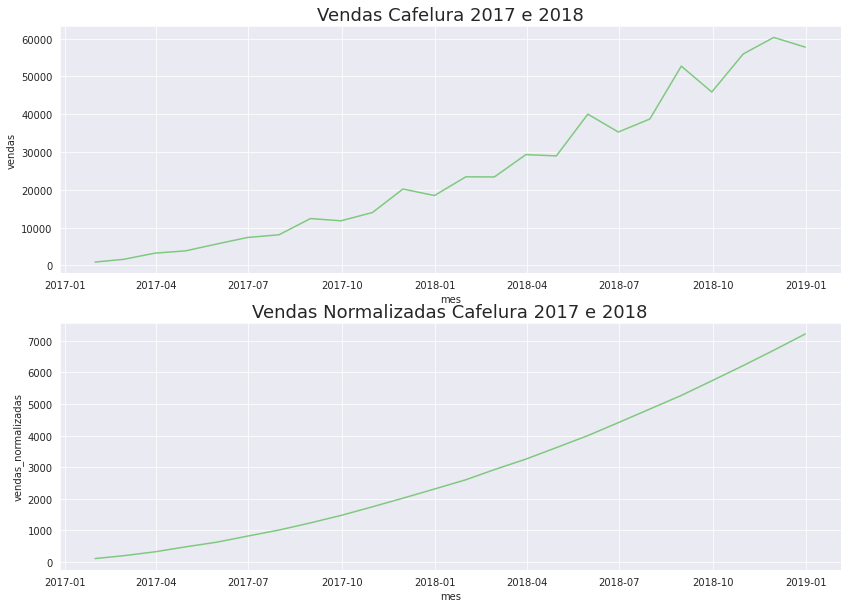

In [98]:
plt.figure(figsize=(14,10))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

* A vendas normalizada mostra que não há sazonalidade nas vendas, são crescimentos não correlacionados. E apresenta que há tendência de crescimento exponencial

# Statsmodels
**objetivo:** Ver como utilizar seasonal_decompose do statsmodels para observar ruído, sazonalidade e tendência.
**Ruído:** É o que impossibilita de analisar direito o gráfico. É sempre bom retirar um pouco dele, mas não tanto pois pode alterar os dados

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


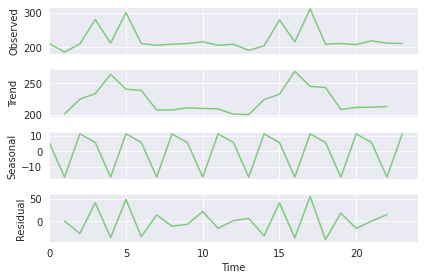

In [101]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3,)   # o freq = 3 é escolha de quem faz, mas é um padrão bom de observação
ax = resultado.plot()

In [102]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [103]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


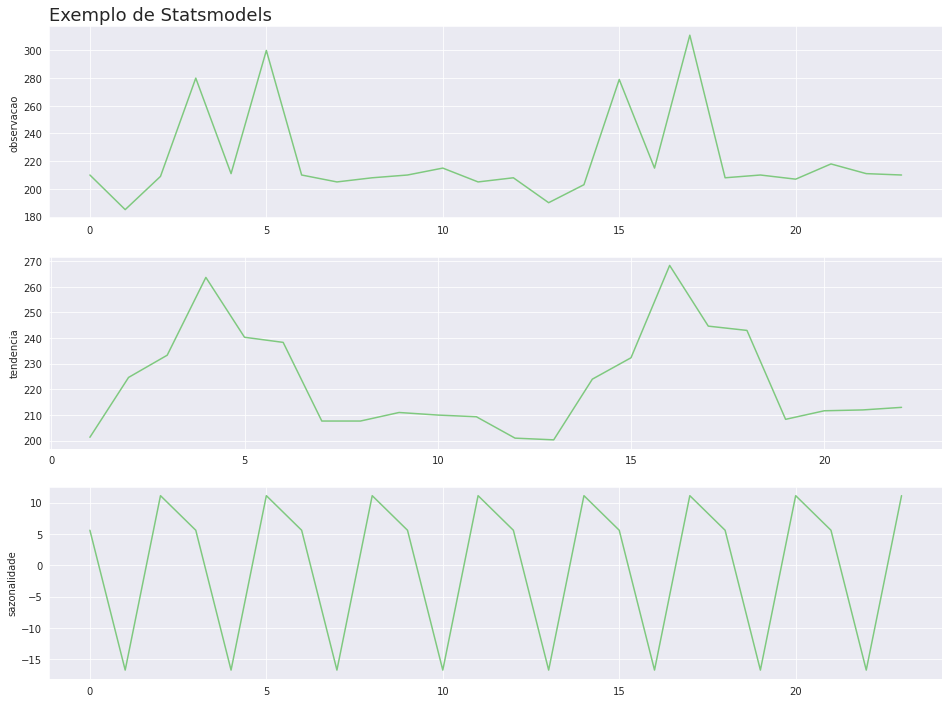

In [104]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

* Com esses três gráficos percebemos há tendência de crescimento e de queda em certo períodos, e sazonalidade também em alguns períodos específicos.

# Alucel - Análise de vendas
**Objetivo:** Aprender a fazer uma média móvel

**Média Móvel:** É um valor de média que altera com o tempo determinado. Ao passar de um dia a média toma outros valores para ser calculada e resulta numa outra média.

In [134]:
alucel = pd.read_csv('alucel.csv')
alucel['dia'] = pd.to_datetime(alucel['dia'])
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


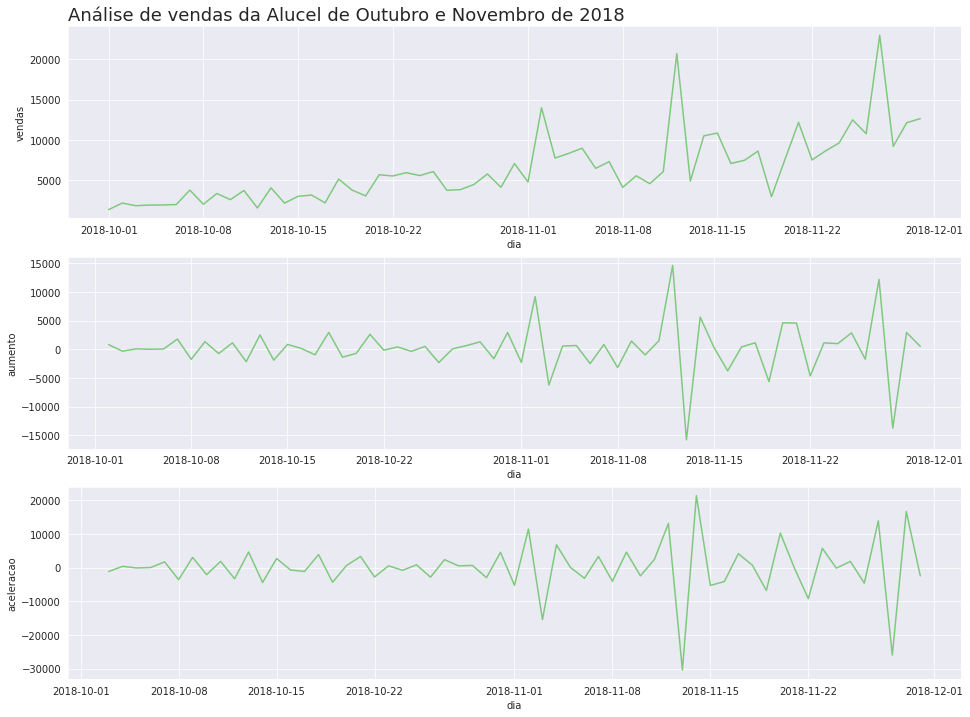

In [110]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média móvel**

* O que faz a média móvel é a combinação de rolling() com mean(). O Rolling() pega uma quantidade de dados específico e o mean faz a média.
* O valor passado para o rolling é a quantidade de dias desejados para pegar e fazer a média móvel

In [111]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()   

In [112]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


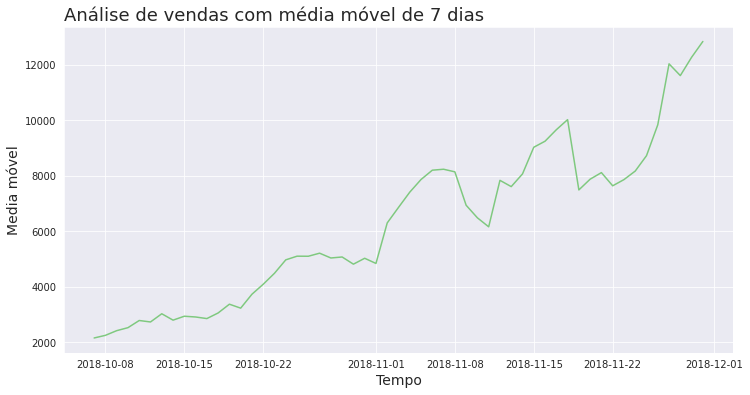

In [113]:
plotar('Análise de vendas com média móvel de 7 dias',
      'Tempo', 'Media móvel', 'dia', 'media_movel', alucel)

In [114]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

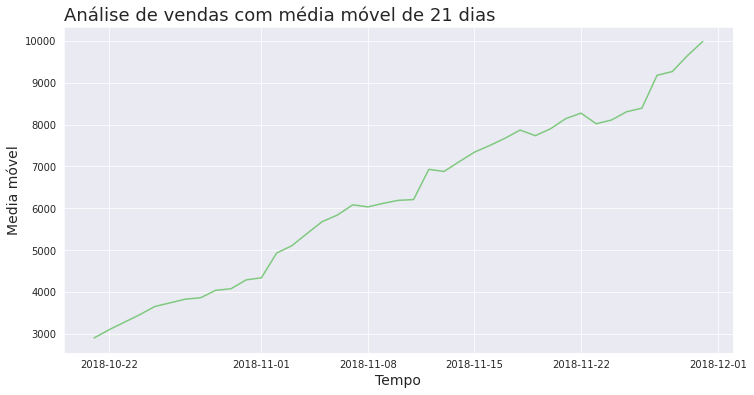

In [115]:
plotar('Análise de vendas com média móvel de 21 dias',
      'Tempo', 'Media móvel', 'dia', 'media_movel_21', alucel)

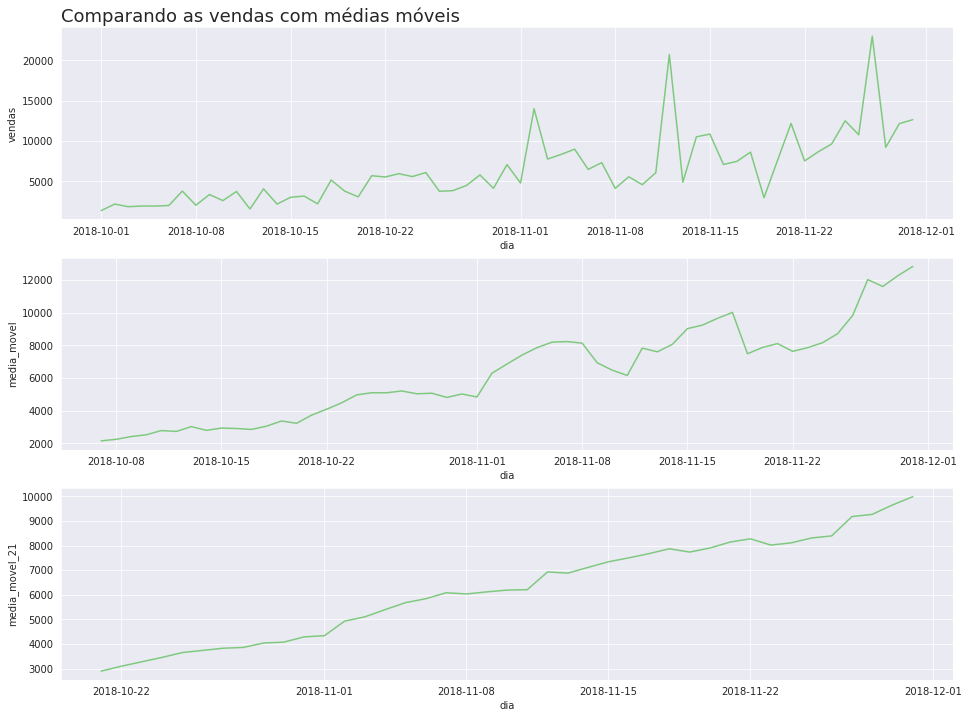

In [116]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
               alucel, 'Comparando as vendas com médias móveis')

* Devemos ser cautelosos aos fazer uma média móvel, porque quanto mais dias pegamos maior será a diminuição dos detalhes do gráfico. Percebemos isso no gráfico de 21 dias, que não apresenta algumas quedas e crescimentos que aparece no de 7 dias